Si tus datos representan composiciones (es decir, cada fila son proporciones que suman el 100%), es muy probable que la distribución conjunta de las 46 columnas esté bien representada por algo similar a una **distribución Dirichlet**. El escenario típico es que, si consideras el vector completo de 46 proporciones, podrías modelarlo con una Dirichlet, que es la distribución "natural" para datos composicionales.

Ahora, si en lugar de eso te enfocas únicamente en una de las columnas (una de las 46 proporciones), la distribución marginal de esa única componente, asumiendo que el vector completo se comporta como una muestra de una Dirichlet, resultará ser una **distribución Beta**. Esto se debe a que la Dirichlet generaliza a múltiples dimensiones lo que la Beta hace en el caso unidimensional.

En resumen, si tienes composiciones que suman a 100% (o a 1, según la escala), la distribución natural para todo el vector es la Dirichlet, y la de una sola columna, tomada individualmente, se comportará como una Beta.

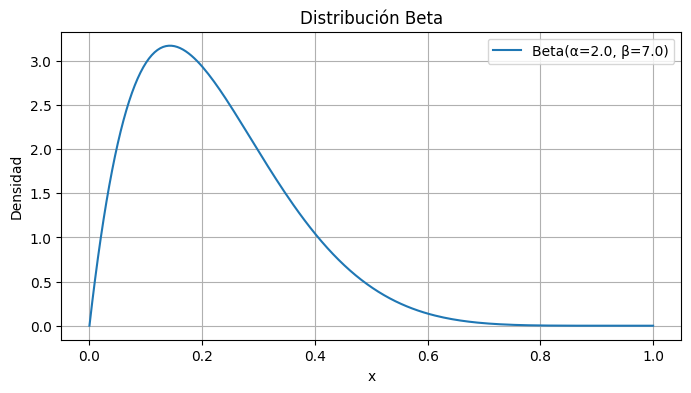

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parámetros de la distribución Beta
alpha = 2.0
beta_param = 7.0

x = np.linspace(0, 1, 200)
y = beta.pdf(x, alpha, beta_param)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label=f"Beta(α={alpha}, β={beta_param})")
plt.title("Distribución Beta")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.grid(True)
plt.legend()
plt.show()


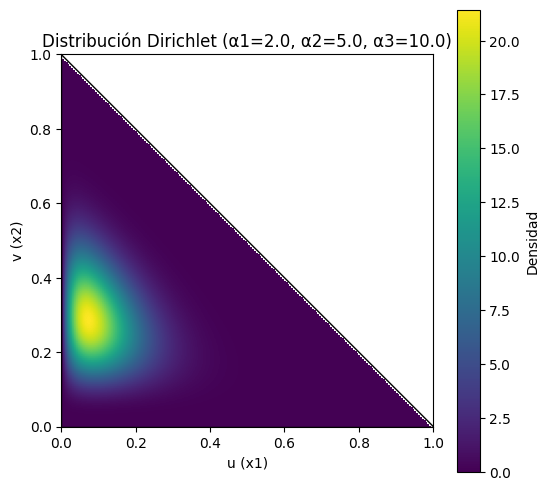

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Parámetros de la Dirichlet
alpha = [2.0, 5.0, 10.0]

n = 200
u_vals = np.linspace(0, 1, n)
v_vals = np.linspace(0, 1, n)

Z = np.zeros((n, n))
tol = 1e-12

for i, u in enumerate(u_vals):
    for j, v in enumerate(v_vals):
        if u + v < 1 - tol:  # Menos estricto, evita la frontera.
            x1 = u
            x2 = v
            x3 = 1 - u - v
            # Asegurarnos de que todos sean >=0 (por si hay error de punto flotante)
            if x1 < 0: x1 = 0
            if x2 < 0: x2 = 0
            if x3 < 0: x3 = 0
            
            Z[j, i] = dirichlet.pdf([x1, x2, x3], alpha)
        else:
            Z[j, i] = np.nan

plt.figure(figsize=(6,6))
masked_Z = np.ma.array(Z, mask=np.isnan(Z))
plt.imshow(masked_Z, origin='lower', extent=[0,1,0,1], cmap='viridis', aspect='equal')
plt.colorbar(label="Densidad")

# Dibujamos las fronteras del simplex
plt.plot([0,1],[1,0],'k-', linewidth=1)
plt.plot([0,0],[0,1],'k-', linewidth=1)
plt.plot([1,0],[0,0],'k-', linewidth=1)

plt.title(f"Distribución Dirichlet (α1={alpha[0]}, α2={alpha[1]}, α3={alpha[2]})")
plt.xlabel("u (x1)")
plt.ylabel("v (x2)")
plt.show()
